In [54]:
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

In [55]:
dataset_original = read_csv('C:/Users/Raeni/PycharmProjects/Spring2025/SUMER2025/DSC680/Datasets/Project1/dataset2.csv', dtype={11: 'string'})

In [56]:
dataset = dataset_original.drop(columns=["vin","daysonmarket","dealer_zip","description","franchise_dealer","franchise_make","isCab","latitude","listed_date","listing_id","longitude","main_picture_url","major_options","savings_amount","seller_rating","sp_id","sp_name","trim_name","trimId","combine_fuel_economy","fleet","interior_color","is_certified","is_new","length","power","theft_title","torque","vehicle_damage_category","wheel_system_display","transmission_display"])

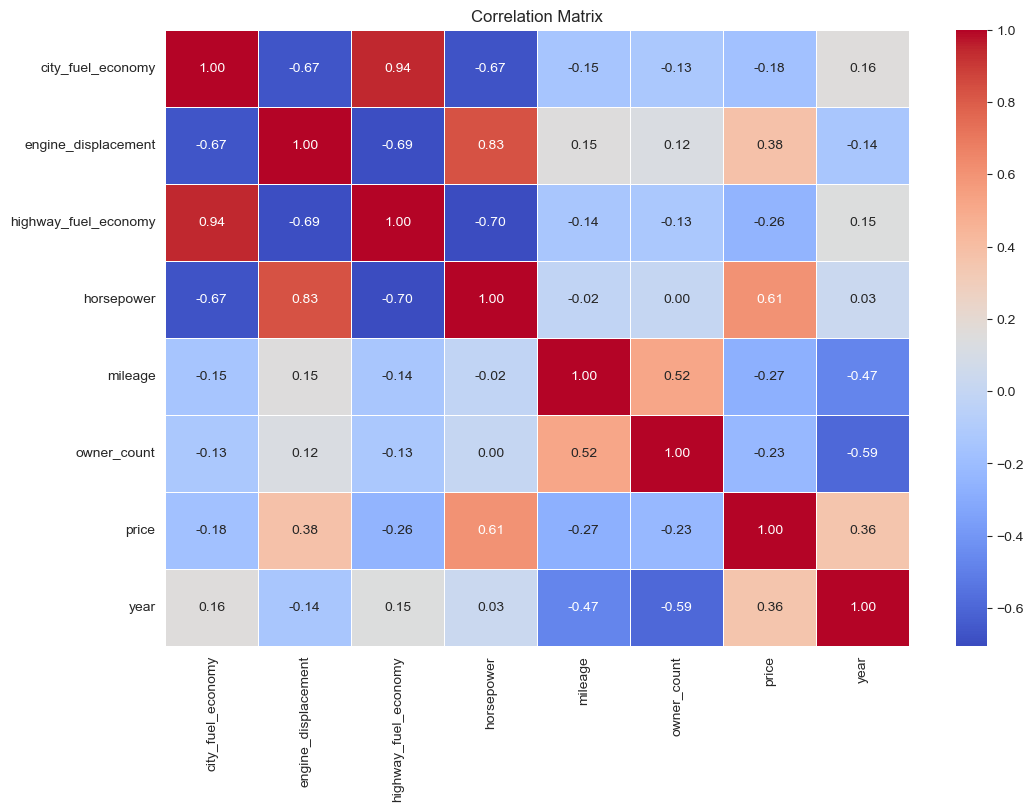

In [57]:
corr_matrix = dataset.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [58]:
dataset = dataset.dropna(subset=['highway_fuel_economy','mileage','owner_count'])

In [59]:
dataset = dataset.dropna(subset=["frame_damaged","front_legroom","has_accidents","height","is_cpo","is_oemcpo","salvage","wheelbase","width","body_type","city_fuel_economy","engine_cylinders","engine_type","exterior_color","fuel_type","fuel_type","horsepower","transmission","wheel_system"])

In [60]:
subset = ["bed","bed_height","bed_length","cabin","back_legroom"]
dataset[subset] = dataset[subset].fillna(0)

In [61]:
dataset.shape

(113851, 35)

In [62]:
dataset.isnull().sum()

back_legroom            0
bed                     0
bed_height              0
bed_length              0
body_type               0
cabin                   0
city                    0
city_fuel_economy       0
engine_cylinders        0
engine_displacement     0
engine_type             0
exterior_color          0
frame_damaged           0
front_legroom           0
fuel_tank_volume        0
fuel_type               0
has_accidents           0
height                  0
highway_fuel_economy    0
horsepower              0
is_cpo                  0
is_oemcpo               0
listing_color           0
make_name               0
maximum_seating         0
mileage                 0
model_name              0
owner_count             0
price                   0
salvage                 0
transmission            0
wheel_system            0
wheelbase               0
width                   0
year                    0
dtype: int64

In [63]:
dataset = pd.get_dummies(dataset)

In [64]:
dataset.shape

(113851, 6638)

In [ ]:
target = dataset["price"]
features = dataset.drop(["price"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=18)

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_pred = linear_model.predict(x_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MSE:", mean_squared_error(y_test, y_pred))

In [53]:
y_train_pred = linear_model.predict(x_train)
y_test_pred = linear_model.predict(x_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Train R^2 Score:", r2_train)
print("Test R^2 Score:", r2_test)

Train R^2 Score: 0.9223992951653348
Test R^2 Score: 0.923247973374541


In [48]:
selector = VarianceThreshold(threshold=0.01)
reduced_data = selector.fit_transform(dataset)

low_freq_cols = [col for col in dataset.columns if dataset[col].sum() < 10]
dataset = dataset.drop(columns=low_freq_cols)

In [49]:
dataset.shape

(113851, 3523)

In [50]:
target = dataset["price"]
features = dataset.drop(["price"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=18)

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_pred = linear_model.predict(x_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MSE:", mean_squared_error(y_test, y_pred))

R^2 Score: 0.923247973374541
MAE: 1959.5692734361592
RMSE: 3926.982503105245
MSE: 15421191.579694735


In [ ]:
y_train_pred = linear_model.predict(x_train)
y_test_pred = linear_model.predict(x_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Train R^2 Score:", r2_train)
print("Test R^2 Score:", r2_test)

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='r2'
)
grid_search.fit(x_train, y_train)
random_forest_model = grid_search.best_estimator_

y_pred = random_forest_model.predict(x_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MSE:", mean_squared_error(y_test, y_pred))

In [51]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(x_train, y_train)

y_pred = decision_tree_model.predict(x_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MSE:", mean_squared_error(y_test, y_pred))

R^2 Score: 0.8191946455165112
MAE: 2098.2807518334726
RMSE: 6027.256642534338
MSE: 36327822.63497431
